In [1]:
%matplotlib inline
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
import math 
from scipy import misc

In [2]:
def series_sum(D,h, lower_bound, upper_bound):
    values = np.linspace(lower_bound, upper_bound, 100)
    interpolant = np.zeros(shape = 100)
    i = 0
    for x in values:
        sum = 0
        for m in range(-10000, 10001):
            exponent = -((x-m*h)*(x-m*h))/(D*h*h)
            sum += 1/math.sqrt(math.pi*D) * math.sin(m*h) * math.exp(exponent)
        interpolant[i] = sum
        i += 1
    return values, interpolant 

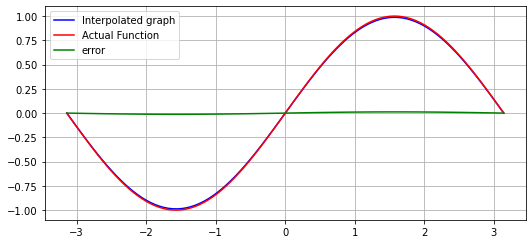

In [3]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

def f(x):
   return np.sin(x)

x = np.linspace(-math.pi, math.pi, 100)

plt.grid()
values, interpolant = series_sum(5, 0.1, -math.pi, math.pi)
plt.plot(values, interpolant, color = 'blue', label = 'Interpolated graph')
plt.plot(x, f(x), color = 'red', label = 'Actual Function')
plt.plot(x, f(x) - interpolant, color = 'green', label = 'error')
plt.legend()
plt.show()

In [4]:
def quasi_interpolant(x,y, D, h):
    # Inputs the values of x, y and gives the infinite sum of the series
    sum = 0
    for m1 in range(-1000, 1001):
        for m2 in range(-1000, 1001):
            exponent = -((x-m1*h)**2+(y-m2*h)**2)/D*h**2
            sum += 1/(math.pi * D) * (3*m1*h+4*m2*h) * math.exp(exponent)
    return sum/10000


In [5]:
print(quasi_interpolant(2,2, 5, 0.1))

13.99999983336027


In [6]:
X = np.linspace(0, 2, 5)
Y = np.linspace(0, 2, 5)

interpolant = np.zeros((X.shape[0], Y.shape[0]))
curr_x = 0
for x in X:
    curr_y = 0
    for y in Y:
        interpolant[curr_x][curr_y] = quasi_interpolant(x, y, 5, 0.1)
        curr_y += 1
    curr_x += 1

In [7]:
print(interpolant[1][1])

3.4999999623023665


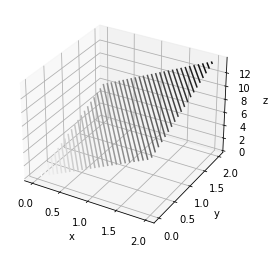

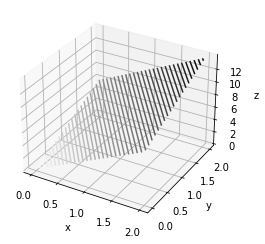

In [8]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, interpolant, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

fig